# Tech Job Posting Title Analysis

## Finding Data

# Identifying Jobs

### Prepping Our Data / Filtering out unneeded text:

In [1]:
import pandas as pd

In [2]:
# Location where I downloaded the kaggle dataset
data_path = r"D:\GIT\job_terms\6020_8902_compressed_Dice_US_jobs.csv/Dice_US_jobs.csv"

In [3]:
# Read the csv into a pandas (package) dataframe -- excel for python
df = pd.read_csv(data_path, encoding="latin")

In [4]:
# Here's what it looks like:
df.head(3)

,country_code,date_added,job_board,job_description,job_title,job_type,location,organization,page_url,phone_number,salary,sector
0,US,11/11/2016,https://www.dice.com,"Minimum Required Skills:EDI, TrustedLink, AS2,...",EDI Analyst,"Full Time, Full-time, Employee","Stamford, CT",CyberCoders,https://www.dice.com/jobs/detail/EDI-Analyst-%...,NaN,NaN,"EDI, TrustedLink, AS2, VAN - EDI, TrustedLink,..."
1,US,11/11/2016,https://www.dice.com,"InformaticaåÊ/ ETL DeveloperSt, Petersburg, FL...",Informatica ETL Developer,"Full Time, Full Time","St Petersburg, FL",TrustMinds,https://www.dice.com/jobs/detail/Informatica-E...,NaN,NaN,ETL Informatica B2B Data Exchange Netezza Orac...
2,US,11/11/2016,https://www.dice.com,pmayekar@kanandcorp.com 512-697-8897Sunnyvale ...,Angular developer,"Full Time, Contract Corp-To-Corp, Contract Ind...","Sunnyvale, CA",K Anand Corporation,https://www.dice.com/jobs/detail/Angular-devel...,NaN,NaN,Angular


In [5]:
from nltk.stem.porter import PorterStemmer
import re

In [6]:
porter_stemmer = PorterStemmer()

In [7]:
def tokenize(str_input):
    """Takes a string and returns a list of words"""
    words = re.sub(r"[^A-Za-z0-9\']", " ", str_input).lower().split()
    return words

In [8]:
def stemming_tokenizer(str_input):
    """Takes a string and returns a list of stemmed words"""
    words = tokenize(str_input)
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [9]:
# Example of Stemming:
stemming_tokenizer("run running runs")

['run', 'run', 'run']

In [10]:
# Stemming some words results in two stems, this function takes those lists
# and 'flattens' them so that instead of a list of lists of stems we just
# have a list of stems
def stemWords(words):
    """wrapper around the stemming_tokenizer that takes a list of words,
    stems each, and returns the flattened results
    """
    return list(set([stemmed_word for word in words for stemmed_word in stemming_tokenizer(word)]))

In [11]:
from nltk.corpus import stopwords
# since we stem our job descriptions, we'll want to stem our stop words too
stop_words = stopwords.words('english')

In [12]:
# I found a couple of non-discrimination clauses; we'll stem those and add them to the stop words
human_resources_text = """
does not and shall not discriminate on the basis of race, color, religion (creed), sex, gender, gender expression, age, national origin (ancestry), disability, marital status, sexual orientation, or military status, in any of its activities or operations. These activities include, but are not limited to, hiring and firing of staff, selection of volunteers and vendors, and provision of services. We are committed to providing an inclusive and welcoming environment for all members of our staff, clients, volunteers, subcontractors, vendors, and clients.
is an equal opportunity employer. We will not discriminate and will take affirmative action measures to ensure against discrimination in employment, recruitment, advertisements for employment, compensation, termination, upgrading, promotions, and other conditions of employment against any employee or job applicant on the bases of race, color, gender, national origin, age, religion, creed, disability, veteran's status, sexual orientation, gender identity or gender expression.
"""

In [13]:
# Adding a beneits section I found online to help remove benefits language
human_resources_text += """ PAY & SALARY
Employee Benefits: Examples of the Most Common Employee Perks
January 3, 2020
When searching for a job, it is important to consider a potential employer’s benefits package. The quality of the employee benefits will often show how much an employer values the health and happiness of their employees. If you are looking for a new job or want to know how your current benefits compare to other professionals, you will need to conduct some research. In this article, we will define employee benefits and offer examples of common types of benefits and perks.

What is an employee benefits package?
When you agree to work for a company or organization, they should offer you an employee benefits package. Many individuals take the quality of a comprehensive benefits package into account when deciding whether or not to accept a job offer. Benefits usually include services and policies that provide for the employee’s physical and mental health, their work/life balance and their personal goals. Many employers prioritize offering quality benefits because they contribute to employee satisfaction, retention and overall productivity.

Common employee benefits examples
Most employers offer a variety of employee perks, which are bundled into an employee benefits package. Here are the most common employee benefits:

Health insurance
Disability insurance
Dental and vision insurance
Life insurance
PTO/paid holidays
Retirement planning
Family leave
Remote work or flexible schedules
Student loan repayment
Continued education and professional
Health insurance
The most common type of employee benefit is health insurance. Corporations, small businesses and even non-profit organizations offer health insurance for their employees. The health insurance provider, the details of the policy and the amount of coverage are usually decided upon by the company. In some cases, if an employee already has health insurance, they can make a request or negotiate in order to keep their original healthcare plan.

Health insurance usually covers doctor visits, prescription medications and trips to the emergency room. If an employee is injured or is diagnosed with a long-term condition, they may need to take advantage of this list’s next benefit.

Disability insurance
If you become unable to work due to an injury or illness, you may choose to take advantage of short-term disability insurance. This benefit means that your employer will continue to pay you a certain percentage of your income until you are able to return to work.

Long-term disability insurance protects you by making sure you will not lose your salary if you become unable to work for a long period of time. Long-term disability insurance is one of the most valuable components of an employee’s benefits package.

Dental and vision insurance
In addition to general health insurance, many employers offer dental coverage. Dental insurance covers routine teeth cleanings, fillings and sometimes surgeries. Dental coverage is cheaper than health insurance, so it can be an affordable option for both the employer and the employees. In some cases, dental insurance is not included in the employee package but is offered at a reduced rate from the health insurance provider.

Vision coverage is another optional but affordable type of insurance. Vision insurance contributes to the bill for eye exams and corrective lenses. If you wear corrective eyewear or if you struggle with your eyesight, vision insurance might be a worthwhile addition to your comprehensive benefits package.

Life insurance
Life insurance is not as common as health insurance, but it can be a valuable addition to your employee benefit package. Some employers offer life insurance at the price of your salary. Others may be willing to pay for a portion of a life insurance policy if you supply the remaining funds. Life insurance is an example of an employee perk that can benefit your family as well as yourself.

PTO/paid holidays
Another common employee benefit is paid time-off, or PTO. PTO refers to days or weeks when you can take time away from work while still being paid your usual salary. Typically, you earn a certain amount of PTO for every day or week that you work. Employees often choose to save up their PTO days and use them for a lengthy vacation in the summer or around the holidays.

Holidays are a specific type of PTO. In addition to the most common holidays (Thanksgiving, Christmas, etc.), your employer will likely decide on other nationally recognized holidays which will serve as PTO for the entire team. The goal of giving PTO on holidays is to allow employees (and the employer) to spend quality time with loved ones.

Retirement planning
Anticipating retirement is an important consideration for employees in every stage of life. Many employers find it necessary to offer 401(k) plans in order to be competitive in the job market. In order to enroll in a 401(k) plan, you must be ruled eligible to participate. Some employers may also offer a matching program that will help you grow your retirement savings. Consult your employee handbook or HR department to find out your employer’s specifications.

Family leave
Family leave, sometimes called maternity leave, is a period of time-off given to mothers and/or fathers in the weeks leading up to and following the birth of a child. This benefit is one of the highest requested by employees and has become increasingly common. Competitive employers are also offering paid family leave more frequently in recent years. Some more specialized types of family leave include the event of an adoption, a new foster child or a surrogacy.

Remote work or flexible schedules
more employees are able to do their jobs from home. Some employers offer regular opportunities for employees to work outside their usual environment. This benefit allows employees to take a break from a hectic environment and work from the comfort of their home or other low-stress locations.

Even if an employer cannot offer remote opportunities, they may be able to allow for flexible work schedules. This permits employees to work during hours that suit them. Some statistics show that employees who work flexible hours or work from home show higher levels of productivity.

Student loan repayment
An attractive employee benefit for recent graduates is a student loan repayment plan. This benefit is relatively rare, but can be necessary for job searchers with extensive student debt. Typically, employers who offer this benefit might agree to pay a portion of an employee’s student loan payments each month or they may offer a set sum for an entire year.

Continued education and professional
Another employee perk is continuing education opportunities. Some employers will pay for you to take college courses, complete their degrees or acquire a degree in a new field. Additionally, some might pay for you to attend professional training courses, technical lectures or to take a certification exam. If you have considerable potential as an employee, providing for your continued improvement as a professional is in your employer’s best interest.

Employee benefits are an important part of any employee contract. Before taking a job offer, be sure to carefully consider the employee benefits package and do not be afraid to ask about the possibility of adding more perks. Most employers value their employee’s satisfaction, and some may be willing to negotiate the terms of their employee benefits. Researching competitive employee benefits will help you be a more informed and savvy employee.
"""

In [14]:
# After several iterative runs I manually created and updated this list
# of more terms/phrases that were showing up in the clusters
human_resources_text += """
copyright

please send resume
email
please apply
employer
proud
form
send
click apply
click
least experience
minimum requirements
preferred requirements
please
skills required
ideal candidate
federal law
state verified
citizen
employer
employable
verify
verified
legal
problem solving
forward word
excellent communication
drive success
written verbal
inc
link
rights reserved
position fit
good
recieve without regard
author 
female male
qualifications
veteran
"""

In [15]:
# I'm adding the human_resources_text tokens to the stopwords list
stop_words = set(stop_words + tokenize(human_resources_text))
# Then stem that list
stemmed_stopwords = set(stemWords(stop_words))

In [16]:
# Here I combine all of the original stop words with the stemmed stopwords
# This shouldn't be necessary, but sometimes the stem of a word can also be stemmed;
# adding the next layer of stemming just catches both cases. I did this in a loop,
# stemming and restemming the words until no new variations
# (stems of stems of stems....) were found

all_stopwords = set()
while len(stemmed_stopwords) != len(stemmed_stopwords & all_stopwords):
    all_stopwords = all_stopwords | stemmed_stopwords
    stemmed_stopwords = set(stemWords(all_stopwords))

all_stopwords = list(all_stopwords | stop_words)

# Note here, using sets (unique lists) and the | (or) and & (and) operators
# is usually much faster than looping over lists

In [17]:
# A better example of stopwords & stemming:
example_stop_words =stopwords.words('english')[5:10]
print("stopword sample:", example_stop_words)
print("stemming each word:", [stemming_tokenizer(word) for word in example_stop_words])
print("stemmed stop words:", stemWords(example_stop_words))

stopword sample: ['our', 'ours', 'ourselves', 'you', "you're"]
stemming each word: [['our'], ['our'], ['ourselv'], ['you'], ["you'r"]]
stemmed stop words: ['you', "you'r", 'our', 'ourselv']


### Turning our job description text into 'data' we can cluster

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 100000,
    stop_words = all_stopwords,
    tokenizer=stemming_tokenizer,
    ngram_range=(1,2)
)
tfidf.fit(df.job_description.to_list())
text = tfidf.transform(df.job_description.to_list())

D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [20]:
print("Let's take a look at what we just caclulated:\n", text.__repr__())

Let's take a look at what we just caclulated:
 <21919x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 4099230 stored elements in Compressed Sparse Row format>


# Clustering our Jobs (Putting them into piles)

In [21]:
from tqdm.notebook import tqdm # Progress bars make me feel better about how slow this runs
from sklearn.metrics import silhouette_score # sklearn has a really handy tool for calculating the silhouettes
from sklearn.cluster import MiniBatchKMeans # perform kMeans clustering

In [22]:
def find_optimal_clusters(data, max_k):
    """performs clustering in a loop, calculating the silhouette for each
    to help us identify the correct (subjective) amount of clusters
    """
    prog = tqdm(total=max_k)
    iters = range(2, max_k+1)
    
    silhouettes = []
    for k in iters:
        KM = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
        silhouettes.append(silhouette_score(data, KM.labels_, metric='euclidean'))
        prog.update(1)
    prog.update(1) # Shouldn't need this, but tqdm sometimes misses it's last update
    return silhouettes

In [23]:
import matplotlib.pyplot as plt #Graphing package to let us see our silhouettes

In [24]:
def plotIt(data, title="title", ylabel="y", xlabel="x", iters=[]):
    """Convience function to show plots"""
    if not iters:
        iters = range(1, len(data)+1)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, data, marker='o')
    ax.set_xlabel(xlabel)
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [25]:
CHECK_K = 10 # FYI Constants are generally also defined at the top of a file
silhouettes = find_optimal_clusters(text, CHECK_K)

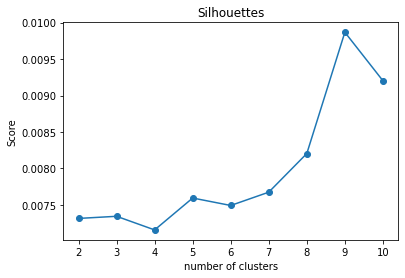

In [26]:
plotIt(silhouettes, title="Silhouettes", ylabel="Score", xlabel="number of clusters", iters=range(2, CHECK_K+1))

In [27]:
# Using a sorting function to find the cluster_count of the highest silhouette score
silhouette_rank = [rank for rank in enumerate(silhouettes)]
silhouette_rank.sort(key = lambda x: x[1], reverse=True)
kSelection = silhouette_rank[0][0] + 2 # 2 offset because the silhouette starts w/ 2 clusters
# I could easily decern this from the chart, but I wanted to pull the value automatically so I could more easily
# reuse this code for other analyis
print(f"Highest Silhouette value is at {kSelection} clusters")

Highest Silhouette value is at 9 clusters


In [28]:
KM = MiniBatchKMeans(n_clusters=kSelection, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [29]:
# This gives us a list, in order, of what pile each posting belongs to:
KM

array([0, 3, 1, ..., 0, 0, 0])

In [30]:
import numpy as np

In [31]:
# I'm adding the cluster number to our dataset so that we can see it inline with our job posting
df['cluster_no'] = KM

### Classifying our Clusters (Manually)

In [32]:
def get_top_keywords(data, clusters, labels, n_terms):
    """Shows us the words that helped sort the postings into their respective clusters"""
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    output = {}
    for i,r in df.iterrows():
        label = [labels[t] for t in np.argsort(r)[-n_terms:]]
        output[i] = label
    return output

In [33]:
def title_cleaner(title):
    """Cleans a job title, removing rank/level, we're more interested in the title than it's level"""
    title = str(title).lower()
    for replacement in ["senior", "sr.", "junior", "jr.", "lead", "principal"]:
        title = title.replace(replacement, "")
    while "  " in title:
        title = title.replace("  ", " ")
    return title.strip()    

In [34]:
def get_title_freq(df, field = 'job_title'):
    """Creates a frequency listing for each unique item in the given field (job_title),
    returning the counts of each
    """
    title_freq = {}
    titles = df[field].to_list()
    for title in titles:
        title = title_cleaner(title)
        if title in title_freq:
            title_freq[title] =  title_freq[title] + 1
        else:
            title_freq[title] = 1
            
    return title_freq

In [35]:
def get_cluster_title_freq(df, field='job_title'):
    """Creates a frequency listing for each cluster/pile, returning the
    counts of each job description within that cluster
    """
    cluster_title_freq = {}
    for cluster_no in set(df.cluster_no):
        cluster_title_freq[cluster_no] = {}
        current_cluster_jobs = df[df.cluster_no == cluster_no]
        cluster_title_freq[cluster_no] = get_title_freq(current_cluster_jobs, field)
    return cluster_title_freq

In [36]:
def get_most_common_titles(freq, n=5):
    """Returns the top N most common titles from a frequency dictionary"""
    return {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)[:n]}


In [38]:
def get_most_common_cluster_titles(freq, n=5):
    """Returns the top N most common titles from each cluster"""
    return {
        cluster_no: get_most_common_titles(title_freq) for (cluster_no, title_freq) in freq.items()
    }

In [39]:
# This is a helpful way to start to understand what makes up our clusters.
# You'll notice some are what I'd call QA, DevOps, DBAs, analysts/data science, etc.
cluster_keywords = get_top_keywords(text, KM, tfidf.get_feature_names(), 50)

In [40]:
# Now we'll get a list of all of the unique titles in each cluster, and how many times it showed up
cluster_title_freq = get_cluster_title_freq(df)
common_cluster_titles = get_most_common_cluster_titles(cluster_title_freq)

In [41]:
for cluster_no, keywords_list in cluster_keywords.items():
    print(f"\nCluster Number {cluster_no}:")
    print(f"  - Keywords: {keywords_list}")
    print(f"  - Common Titles:")
    print("\n".join([f"   > {title}: {count}" for (title, count) in common_cluster_titles[cluster_no].items()]))


Cluster Number 0:
  - Keywords: ['javascript', 'net', 'top', 'read', 'document', 'today u', 'qualifi', 'u', 'unit', 'qualifi receiv', 'complianc', 'today', '2016', 'characterist', 'u directli', 'open', 'go', 'design', '1999', 'receiv characterist', 'open receiv', 'unit verif', 'go bottom', '1999 2016', 'receiv cybercoderscybercod', 'cybercoderscybercod', 'cybercoderscybercod employeral', 'bottom open', '2016 cybercod', 'document 1999', 'employeral', 'employeral qualifi', 'verif document', 'complianc unit', 'characterist complianc', "apply'", "apply' receiv", "'click", 'receiv go', "'click apply'", "directli 'click", 'bottom', 'verif', 'directli', 'cybercod', 'softwar', 'c', 'engin', 'develop', 'receiv']
  - Common Titles:
   > software engineer: 354
   > .net developer: 124
   > devops engineer: 123
   > software developer: 101
   > java developer: 74

Cluster Number 1:
  - Keywords: ['net develop', '5', 'design develop', 'full', 'project', 'stack', 'system', 'html css', 'respons', 'p

In [42]:
cluster_labels = {}
cluster_labels[0] = "Backend Development"
cluster_labels[1] = "UI Development"
cluster_labels[2] = "Project Management"
cluster_labels[3] = "Analysis"
cluster_labels[4] = "Salesforce / Consulting"
cluster_labels[5] = "Sales"
cluster_labels[6] = "Help Desk"
cluster_labels[7] = "DevOps"
cluster_labels[8] = "Network/Systems"

In [ ]:
1/0 

In [43]:
# Now I'll add our selected cluster labels to the dataset so we can see them in-line
df['cluster_label'] = df['cluster_no'].map(cluster_labels)

In [44]:
print("A Sample of our Job Postings sorted by cluster number:")
df[['cluster_no', 'cluster_label', 'job_title', 'job_description']].sample(5).sort_values(by ='cluster_no')

A Sample of our Job Postings sorted by cluster number:


,cluster_no,cluster_label,job_title,job_description
12863,0,Backend Development,Mobile Developer,"Minimum Required Skills:C++/C#/.NET, XAML / WP..."
13760,0,Backend Development,Cloud Operations Engineer,"Minimum Required Skills:Linux, application ser..."
13188,2,Project Management,Project Engineer,Project Engineer Job Description: General Summ...
9656,4,Salesforce / Consulting,Salesforce Developer,Salesforce Developer ; Washington D.C. ; $35.0...
20713,7,DevOps,Junior Systems Engineer,Description:Leidos has a career opening for a ...


### Let's visualize these results

In [45]:
allTitleFreq = get_title_freq(df)
print(f"Unique titles: {len(set(allTitleFreq))}")

Unique titles: 10959


In [46]:
contains = [
    "front",
    "back",
    "full",
    "business analyst",
    "data analyst",
    "data scientist",
    "data engineer",
    "software engineer",
    "software developer",
    "database",
    "sql",
    "etl",
    "devops",
    "network",
    "system",
    "machine learning",
    "project",
    "agile",
]

In [47]:
# Originally I was just going to filter, but there were so many unique titles that
# contain my words that it wasn't as aggregated as I'd hoped

def filterClusterTitles(freq, contains):
    """Filters titles that don't contain one of the words in the contains list"""
    return {
        cluster_no: {
            title:freq
            for (title, freq) in title_freq.items()
            if any([c in title for c in contains])
        } for (cluster_no, title_freq) in freq.items()
    }

In [48]:
# I decided to replace any title containing one of my words with that word
# So "front end developer" just becomes "front" -- this is similar to stemming
# The way I implemented this, if several of my words were in the title it would only
# be counted for the first. For example "agile frontend software developer" would become "front".

def filterReplaceClusterTitles(freq, contains):
    """Filters titles that don't contain one of the words in the contains list
    and replaces the title with the first substring found
    """
    replacerFunc = lambda x, contains: ([c for c in contains if c in x]+[x])[0]
    output = {}
    for (cluster_no, title_freq) in freq.items():
        output[cluster_no] = {}
        for title, freq in title_freq.items():
            cleanTitle = replacerFunc(title, contains)
            if cleanTitle in contains:
                if cleanTitle not in output[cluster_no]:
                    output[cluster_no][cleanTitle] = 0
                output[cluster_no][cleanTitle] += freq
            
        
    return output

In [49]:
# Apply the filter
filter_cluster_title_freq = filterReplaceClusterTitles(
    cluster_title_freq,
    contains
)

In [50]:
# Let's take a look at the top 3 results for each cluster

# Notice how writing `get_most_common_titles` as a function allows us to reuse it here
# DRY (Don't Repeat Yourself) is a fundamental coding principal

for (cluster_no, title_freq) in filter_cluster_title_freq.items():
    print(f"\n{cluster_labels[cluster_no]} (cluster {cluster_no}):")
    print("\n".join([f" - {title}: {count}" for (title, count) in get_most_common_titles(title_freq, n=3).items()]))


Backend Development (cluster 0):
 - software engineer: 622
 - system: 181
 - devops: 169

UI Development (cluster 1):
 - front: 236
 - software engineer: 183
 - full: 168

Project Management (cluster 2):
 - project: 676
 - business analyst: 130
 - system: 59

Analysis (cluster 3):
 - database: 197
 - sql: 170
 - data analyst: 126

Salesforce / Consulting (cluster 4):
 - system: 14
 - business analyst: 9
 - project: 8

Sales (cluster 5):
 - network: 116
 - system: 10
 - project: 4

Help Desk (cluster 6):
 - system: 61
 - network: 59
 - project: 40

DevOps (cluster 7):
 - system: 469
 - business analyst: 274
 - software engineer: 233

Network/Systems (cluster 8):
 - system: 378
 - network: 348
 - back: 9


### Let's build the graphic

In [51]:
import seaborn as sn # One of my favorite graphing packages

In [52]:
# We'll start by getting a list of clusters
clusterNos = set(filter_cluster_title_freq.keys())
print(clusterNos)

{0, 1, 2, 3, 4, 5, 6, 7, 8}


In [53]:
#Next we'll create a matrix that shows the counts of each job posting of a given title within each cluster
countMatrix = np.array([[filter_cluster_title_freq[cluster_no].get(title, 0) for title in contains] for cluster_no in clusterNos])

print(countMatrix)

[[112  98 166  36   7  34  39 622 160  32  29   1 169  48 181  14  76   1]
 [236  38 168   1   0   1   1 183 124   3  15   2   4   2  11   0   2   3]
 [  3   0   3 130   2   0   0   4   4   1   2   2   2  16  59   1 676  12]
 [  2   2  10  35 126  62  41  33   7 197 170  64   4   0  23   3   5   3]
 [  1   0   0   9   0   0   1   6   3   3   0   1   1   1  14   0   8   2]
 [  0   2   0   2   0   0   1   0   0   0   0   0   0 116  10   1   4   0]
 [  5   0   5  17  12   0   2  15   9   4  19   4   4  59  61   0  40   2]
 [  8  28  52 274  23   7   4 233  60  25  62  29 134 124 469   5  87  22]
 [  0   9   2   7   0   0   3   1   0   3   6   0   6 348 378   0   8   0]]


In [56]:
colTotal = 100 * countMatrix.astype('float') / countMatrix.astype('float').T.sum(axis=1)[:, np.newaxis].T
rowTotal = 100 * countMatrix.astype('float') / countMatrix.sum(axis=1)[:, np.newaxis]

In [57]:
def plotMatrix(data, rows, columns, xLabel, yLabel, title, saveAs=""):
    """Plots the data matrix and colors based on weight"""
    df_cm = pd.DataFrame(data, index = rows, columns = contains)
    plt.figure(figsize=(20,8))
    cmplot = sn.heatmap(
        df_cm,
        annot=True,
        cmap="Greens",
        square=True
    )
    xtic = cmplot.set_xticklabels(cmplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    #ytic = cmplot.set_yticklabels(cmplot.get_yticklabels(), rotation=0, horizontalalignment='right')
    plt.xlabel(xLabel, fontsize=18)
    plt.ylabel(yLabel, fontsize=18)
    plt_title = plt.title(title, fontsize=25)
    
    if saveAs:
        fig = cmplot.get_figure()
        fig.savefig(saveAs)

In [58]:
from datetime import datetime

In [59]:
timestamp = datetime.now().strftime("%y%m%d%H%M%S")

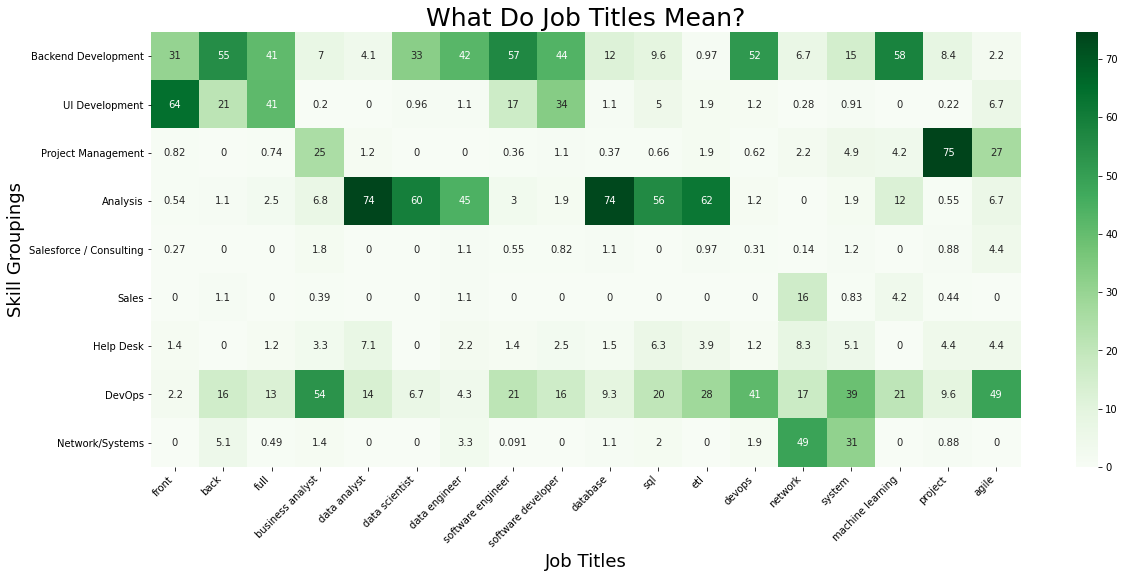

In [62]:
plotMatrix(
    data = colTotal,
    rows = [cluster_labels[i] for i in range(len(colTotal))],
    columns = contains,
    xLabel="Job Titles",
    yLabel="Skill Groupings",
    title="What Do Job Titles Mean?",
    saveAs=f"{timestamp}_TitleMeaning.png"
)

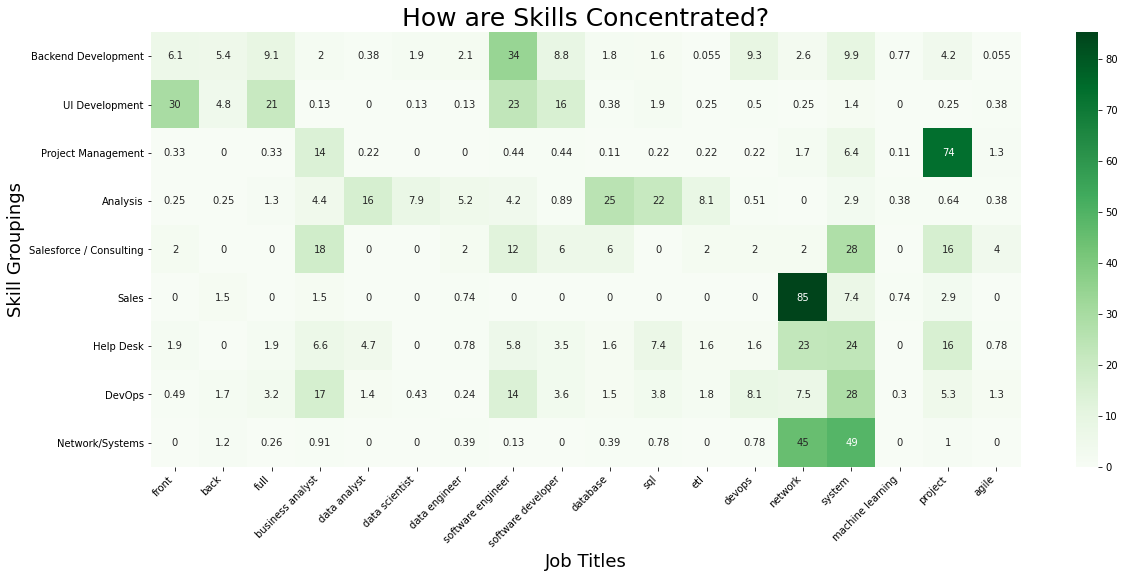

In [63]:
 plotMatrix(
    data = rowTotal,
    rows = [cluster_labels[i] for i in range(len(rowTotal))],
    columns = contains,
    xLabel="Job Titles",
    yLabel="Skill Groupings",
    title="How are Skills Concentrated?",
    saveAs=f"{timestamp}_SkillsUsed.png"
)

# Takeaways:

## Disclaimers:

## Potential Next Steps: